# Pulizia dei dati

## Operazioni preliminari

> Installazione dipendenze necessarie

In [79]:
!pip install langdetect


[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


> Importazione delle librerie

In [80]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler

> Montaggio di Drive

In [81]:
from google.colab import drive
drive.mount('/content/drive')

> Lettura del dataset

In [82]:
# drive path
csv_path = '/content/drive/MyDrive/Progetto_FDSML/tiktok_accounts.csv'

In [83]:
# local path
csv_path = './datasets/tiktok_accounts.csv'

In [84]:
df = pd.read_csv(csv_path)
df.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake
0,279,0,564,0,0,0,0,0,Tik Toker,False,No bio yet,0,gyzituvigy542,False,True
1,1198,71,9980,0,0,0,0,0,BEULAH,True,NaN,0,tshphjtowl2401583tbww,False,True
2,2968,596,1123,2062,266,0,0,0,Lello27,False,NaN,0,aristanismamojadanuoro,False,False
3,2351,200,818,435,36,0,0,0,clemevitale,False,NaN,0,clemevitale,False,False
4,40300,1100000,52,10000000,720,0,3,1,Saher Monther,False,YouTuber star ⭐️,0,sahermonther,True,False


Divisione attributi:
*   *diggCount*, *followerCount*, *signature*, e *downloadSetting* (Annalaura)
*   *followingCount*, *heartCount*, *videoCount*, *duetSetting* e *stitchSetting* (Raffaele)

> Matrice di correlazione

In [85]:
selected_data = df[['diggCount', 'followerCount', 'followingCount', 'heartCount',
                      'videoCount', 'commentSetting', 'downloadSetting', 'duetSetting', 'stitchSetting', 'fake']]
corr_matrix = selected_data.corr()
corr_matrix['fake'].sort_values(ascending=False)

fake               1.000000
followingCount     0.250169
commentSetting    -0.067205
followerCount     -0.102048
heartCount        -0.104520
duetSetting       -0.186717
stitchSetting     -0.190654
diggCount         -0.204800
videoCount        -0.210097
downloadSetting   -0.227304
Name: fake, dtype: float64

# Esplorazione dei dati

In [86]:
len(df)

10043

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        10043 non-null  int64 
 1   followerCount    10043 non-null  int64 
 2   followingCount   10043 non-null  int64 
 3   heartCount       10043 non-null  int64 
 4   videoCount       10043 non-null  int64 
 5   commentSetting   10043 non-null  int64 
 6   downloadSetting  10043 non-null  int64 
 7   duetSetting      10043 non-null  int64 
 8   nickname         10043 non-null  object
 9   openFavorite     10043 non-null  bool  
 10  signature        6536 non-null   object
 11  stitchSetting    10043 non-null  int64 
 12  uniqueId         10043 non-null  object
 13  verified         10043 non-null  bool  
 14  fake             10043 non-null  bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 971.1+ KB


In [88]:
df.describe()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,stitchSetting
count,10043.000000,1.004300e+04,10043.000000,1.004300e+04,10043.000000,10043.000000,10043.000000,10043.000000,10043.000000
mean,3893.421189,2.218839e+05,1043.106641,3.978432e+06,66.211889,0.009161,0.146968,0.089316,0.093100
std,17247.832989,2.177557e+06,2186.721075,3.812251e+07,311.690438,0.136519,0.647570,0.479087,0.489071
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,2.000000e+00,176.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,358.000000,5.400000e+01,533.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,761.000000,5.120000e+02,686.000000,9.060000e+02,17.000000,0.000000,0.000000,0.000000,0.000000
max,386100.000000,8.230000e+07,10000.000000,1.400000e+09,9300.000000,3.000000,3.000000,3.000000,3.000000


> bins indica l'intervallo di valori che coprirà ciascuna barra dell'istogramma (eg. 0-50, 50-100, per valori da 0 a +inf)
> valutare se farlo ad hoc per ciascun attributo numerico

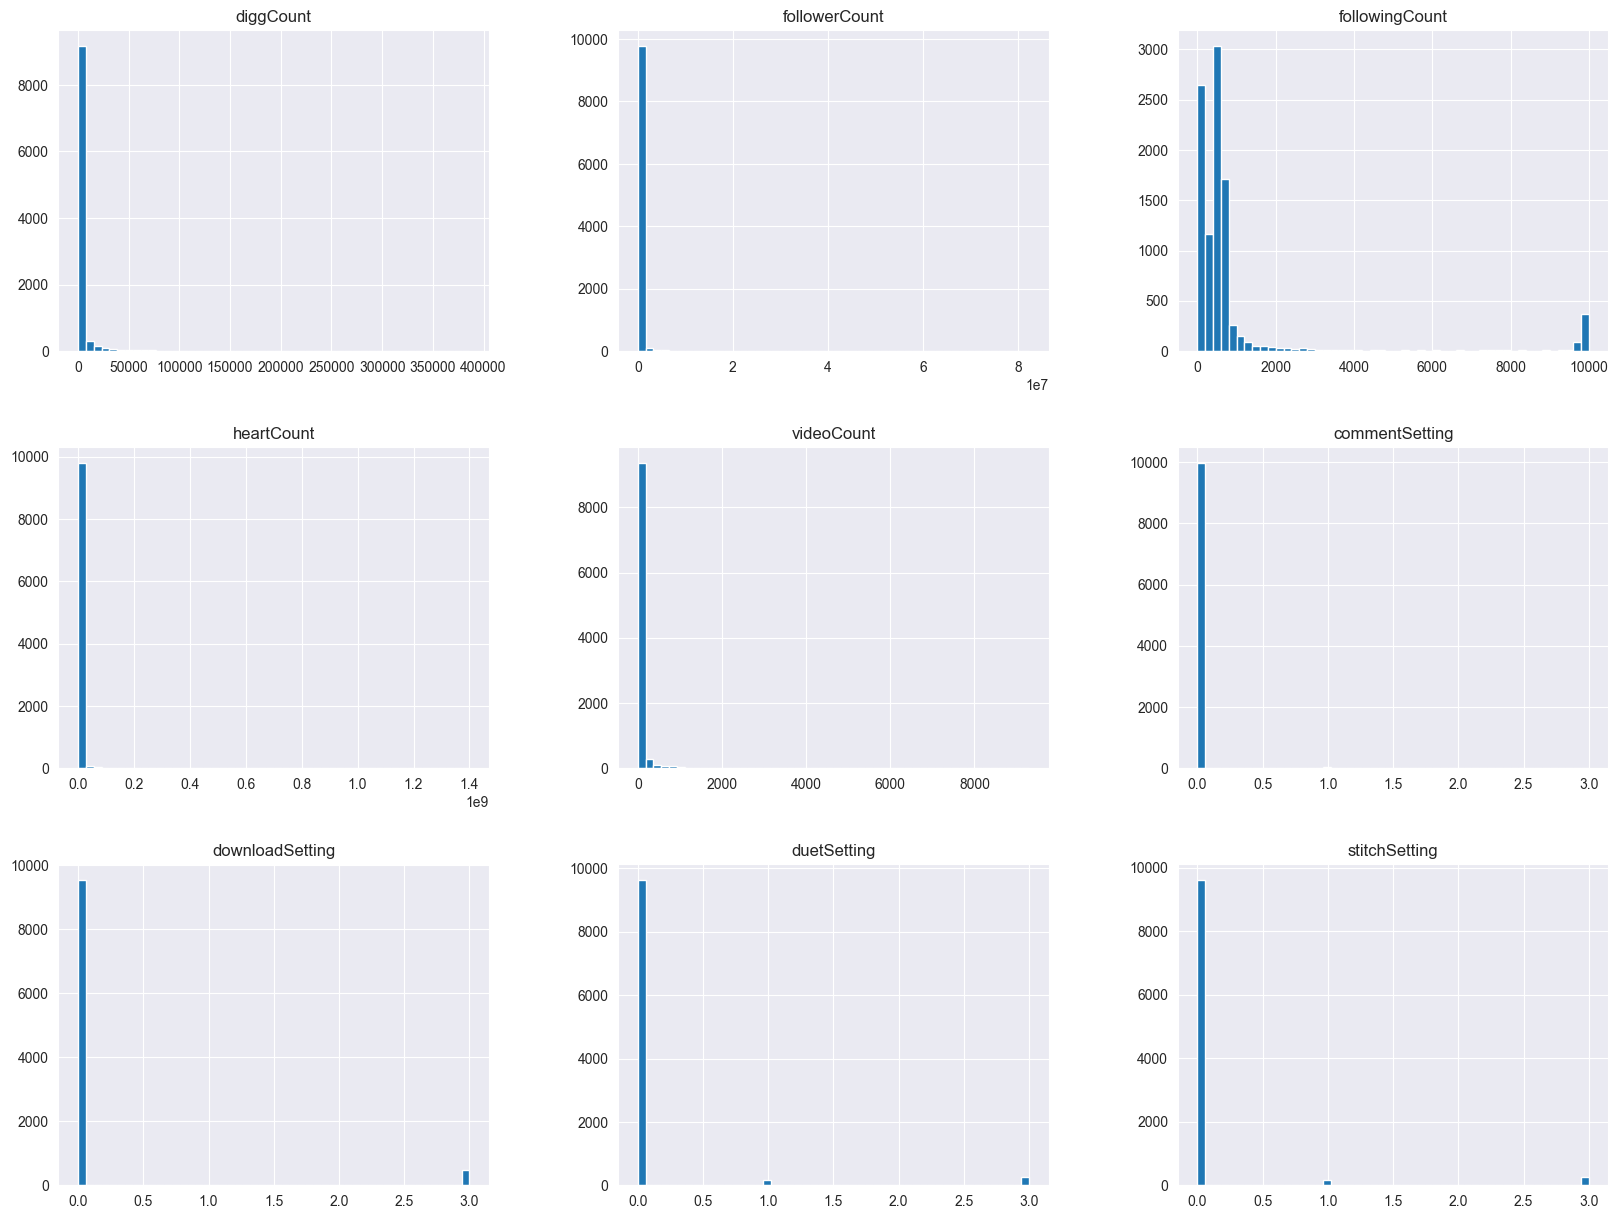

In [89]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [90]:
# Vedo massimo e minimo di ogni attributo
print("Massimo Digg Count:", df['diggCount'].max())
print("Minimo Digg Count:", df['diggCount'].min())

print("Massimo Follower Count:", df['followerCount'].max())
print("Minimo Follower Count:", df['followerCount'].min())

print("Massimo Following Count:", df['followingCount'].max())
print("Minimo Following Count:", df['followingCount'].min())

print("Massimo Heart Count:", df['heartCount'].max())
print("Minimo Heart Count:", df['heartCount'].min())

print("Massimo Video Count:", df['videoCount'].max())
print("Minimo Video Count:", df['videoCount'].min())

print("Massimo Comment Setting:", df['commentSetting'].max())
print("Minimo Comment Setting:", df['commentSetting'].min())

print("Massimo Download Setting:", df['downloadSetting'].max())
print("Minimo Download Setting:", df['downloadSetting'].min())

print("Massimo Duet Setting:", df['duetSetting'].max())
print("Minimo Duet Setting:", df['duetSetting'].min())

print("Massimo Stitch Setting:", df['stitchSetting'].max())
print("Minimo Stitch Setting:", df['stitchSetting'].min())

Massimo Digg Count: 386100
Minimo Digg Count: 0
Massimo Follower Count: 82300000
Minimo Follower Count: 0
Massimo Following Count: 10000
Minimo Following Count: 0
Massimo Heart Count: 1400000000
Minimo Heart Count: 0
Massimo Video Count: 9300
Minimo Video Count: 0
Massimo Comment Setting: 3
Minimo Comment Setting: 0
Massimo Download Setting: 3
Minimo Download Setting: 0
Massimo Duet Setting: 3
Minimo Duet Setting: 0
Massimo Stitch Setting: 3
Minimo Stitch Setting: 0


# Pulizia *signature*

In [91]:
df['signature'] = df['signature'].fillna('')
df['signature'] = df['signature'].replace('No bio yet', '')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        10043 non-null  int64 
 1   followerCount    10043 non-null  int64 
 2   followingCount   10043 non-null  int64 
 3   heartCount       10043 non-null  int64 
 4   videoCount       10043 non-null  int64 
 5   commentSetting   10043 non-null  int64 
 6   downloadSetting  10043 non-null  int64 
 7   duetSetting      10043 non-null  int64 
 8   nickname         10043 non-null  object
 9   openFavorite     10043 non-null  bool  
 10  signature        10043 non-null  object
 11  stitchSetting    10043 non-null  int64 
 12  uniqueId         10043 non-null  object
 13  verified         10043 non-null  bool  
 14  fake             10043 non-null  bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 971.1+ KB


> Conta ed elimina le istanze con signature non in inglese

In [93]:
count = 0

for i, signature in enumerate(df['signature']):
  if signature == '':
    continue
  try:
    language = detect(signature)
  except:
    continue
  if language != 'en':
    count += 1
    df = df.drop(i)

df = df.reset_index(drop=True)
print(count)

1342


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8701 entries, 0 to 8700
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        8701 non-null   int64 
 1   followerCount    8701 non-null   int64 
 2   followingCount   8701 non-null   int64 
 3   heartCount       8701 non-null   int64 
 4   videoCount       8701 non-null   int64 
 5   commentSetting   8701 non-null   int64 
 6   downloadSetting  8701 non-null   int64 
 7   duetSetting      8701 non-null   int64 
 8   nickname         8701 non-null   object
 9   openFavorite     8701 non-null   bool  
 10  signature        8701 non-null   object
 11  stitchSetting    8701 non-null   int64 
 12  uniqueId         8701 non-null   object
 13  verified         8701 non-null   bool  
 14  fake             8701 non-null   bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 841.3+ KB


# Pulizia *diggCount*

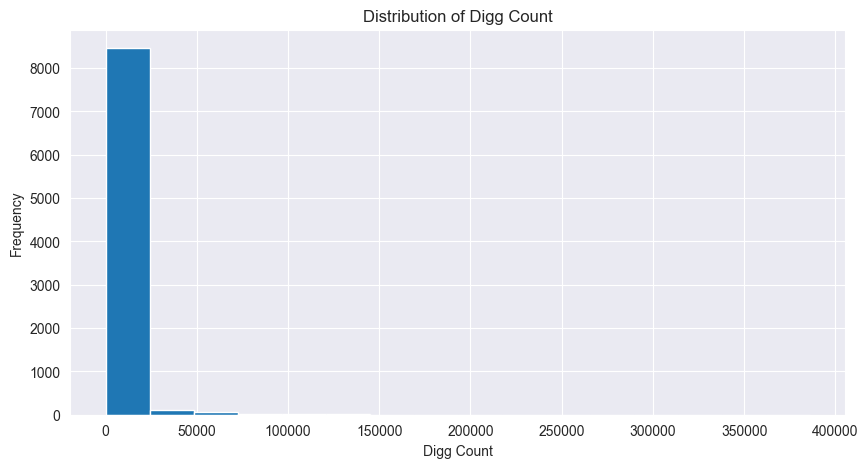

In [95]:
df['diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('Digg Count')
plt.ylabel('Frequency')
plt.title('Distribution of Digg Count')
plt.show()

In [96]:
stats = df['diggCount'].describe()
stats

count      8701.000000
mean       2972.146995
std       14542.117528
min           0.000000
25%         214.000000
50%         350.000000
75%         516.000000
max      386100.000000
Name: diggCount, dtype: float64

## Standardizzazione con StandardScaler

In [97]:
scaler = StandardScaler()
data = df[['diggCount', 'followerCount', 'followingCount', 'heartCount', 'videoCount']]
data_scaled = scaler.fit_transform(data)
df_standardized = pd.DataFrame(data_scaled, columns=data.columns)
df_standardized.head()

,diggCount,followerCount,followingCount,heartCount,videoCount
0,-0.185207,-0.085823,-0.243562,-0.088129,-0.199712
1,-0.122008,-0.085788,3.854087,-0.088129,-0.199712
2,-0.000285,-0.085525,-0.000297,-0.088064,1.093970
3,-0.042716,-0.085723,-0.133026,-0.088115,-0.024627
4,-0.181425,-0.085823,-0.226155,-0.088129,-0.199712


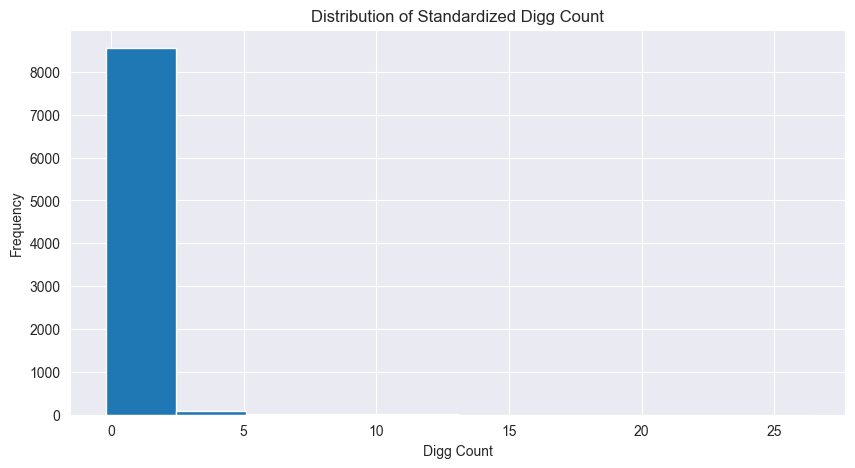

In [98]:
df_standardized['diggCount'].hist(figsize=(10,5))
plt.xlabel('Digg Count')
plt.ylabel('Frequency')
plt.title('Distribution of Standardized Digg Count')
plt.show()

## Quantile Transformation

In [99]:
qt = QuantileTransformer(output_distribution='uniform')
df['quantile_transformed_diggCount'] = qt.fit_transform(df[['diggCount']])

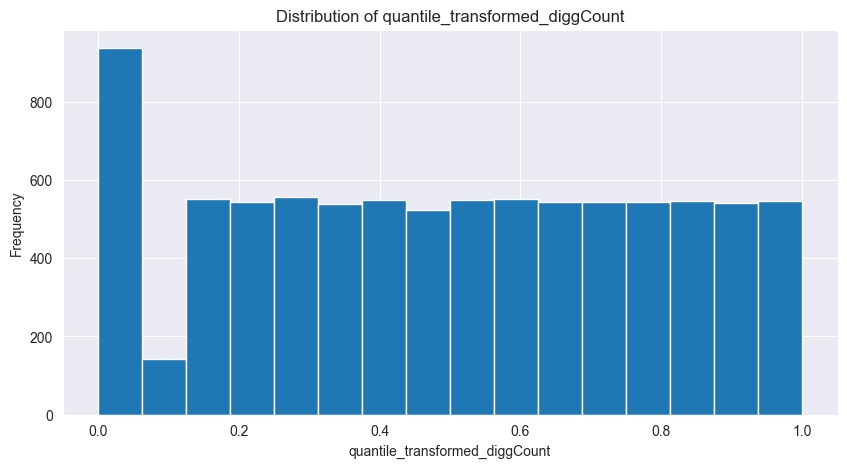

In [107]:
df['quantile_transformed_diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('quantile_transformed_diggCount')
plt.ylabel('Frequency')
plt.title('Distribution of quantile_transformed_diggCount')
plt.show()

In [101]:
stats = df['quantile_transformed_diggCount'].describe()
stats

count    8701.000000
mean        0.494207
std         0.297837
min         0.000000
25%         0.250250
50%         0.500000
75%         0.750083
max         1.000000
Name: quantile_transformed_diggCount, dtype: float64

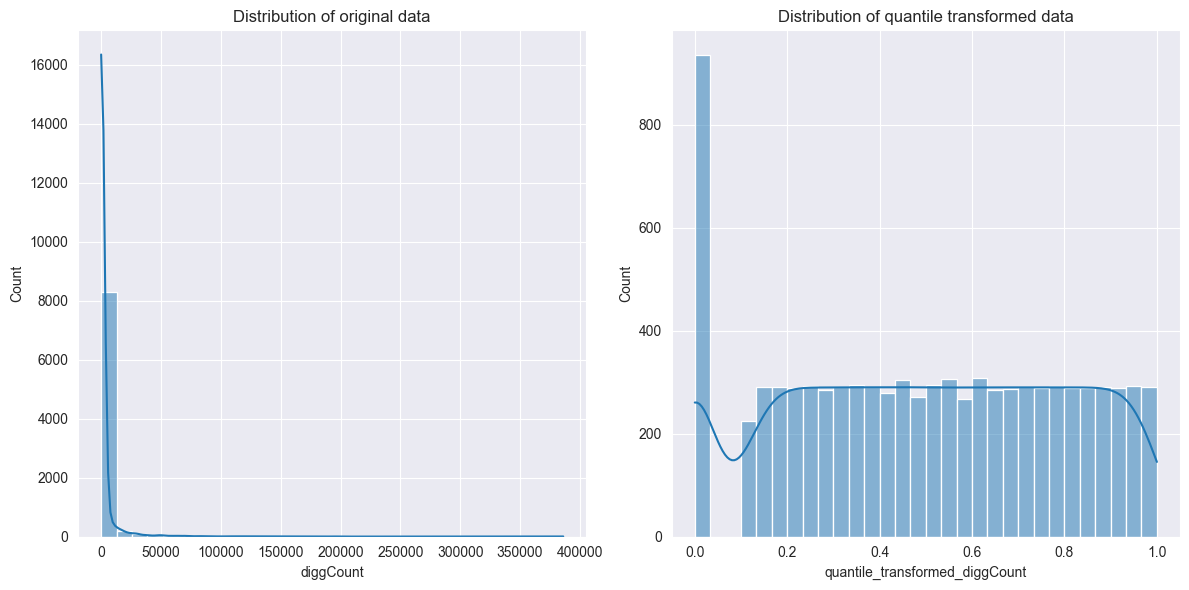

In [102]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['diggCount'], bins=30, kde=True)
plt.title('Distribution of original data')

plt.subplot(1, 2, 2)
sns.histplot(df['quantile_transformed_diggCount'], bins=30, kde=True)
plt.title('Distribution of quantile transformed data')

plt.tight_layout()
plt.show()

In [103]:
df.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake,quantile_transformed_diggCount
0,279,0,564,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,True,0.312312
1,1198,71,9980,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True,0.826185
2,2968,596,1123,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False,0.885362
3,2351,200,818,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,False,0.871853
4,334,0,604,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True,0.451451


## Min-Max Scaler

In [104]:
scaler = MinMaxScaler()
df['scaled_diggCount'] = scaler.fit_transform(df[['diggCount']])

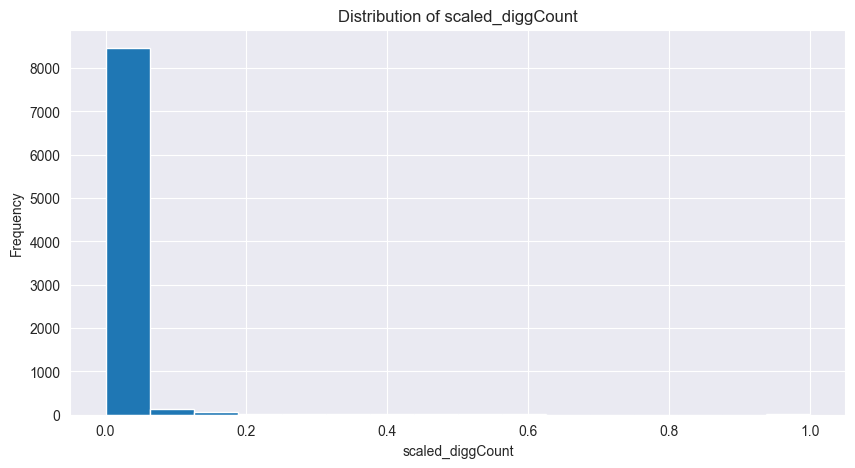

In [105]:
df['scaled_diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('scaled_diggCount')
plt.ylabel('Frequency')
plt.title('Distribution of scaled_diggCount')
plt.show()

In [108]:
stats = df['scaled_diggCount'].describe()
stats

count    8701.000000
mean        0.007698
std         0.037664
min         0.000000
25%         0.000554
50%         0.000907
75%         0.001336
max         1.000000
Name: scaled_diggCount, dtype: float64

In [109]:
df.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake,quantile_transformed_diggCount,scaled_diggCount
0,279,0,564,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,True,0.312312,0.000723
1,1198,71,9980,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True,0.826185,0.003103
2,2968,596,1123,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False,0.885362,0.007687
3,2351,200,818,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,False,0.871853,0.006089
4,334,0,604,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True,0.451451,0.000865
